# Heart Failure Prediction

Predictive Analytics Project 

by:
Sruthi A (23030242001),
Abha Mistry (23030242002),
Dhruvi Patel (23030242018)

# Problem statement:
The problem addressed in this case is the prediction of heart failure based on various clinical and demographic features. 

Dataset description: The dataset includes information about patients, such as age, presence of anemia, creatinine phosphokinase levels, diabetes status, ejection fraction, high blood pressure, platelet count, serum creatinine levels, serum sodium levels, gender, smoking status, and time. The target variable, "HEART_FAILURE", indicates whether a patient has experienced heart failure (1) or not (0).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

In [2]:
# Reading the dataset "heart_failure_clinical_records.csv" into a pandas DataFrame
data = pd.read_csv("heart_failure_clinical_records.csv")

In [3]:
# Displaying the first few rows of the dataset to get an overview of the data
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,HEART_FAILURE
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Providing information about the dataset, including data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  HEART_FAILURE             299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Displaying descriptive statistics of the dataset, such as mean, standard deviation, minimum, maximum, etc.
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,HEART_FAILURE
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
# Checking for missing values in the dataset and summing them up for each column
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
HEART_FAILURE               0
dtype: int64

# Exploratory Data Analysis

<Axes: >

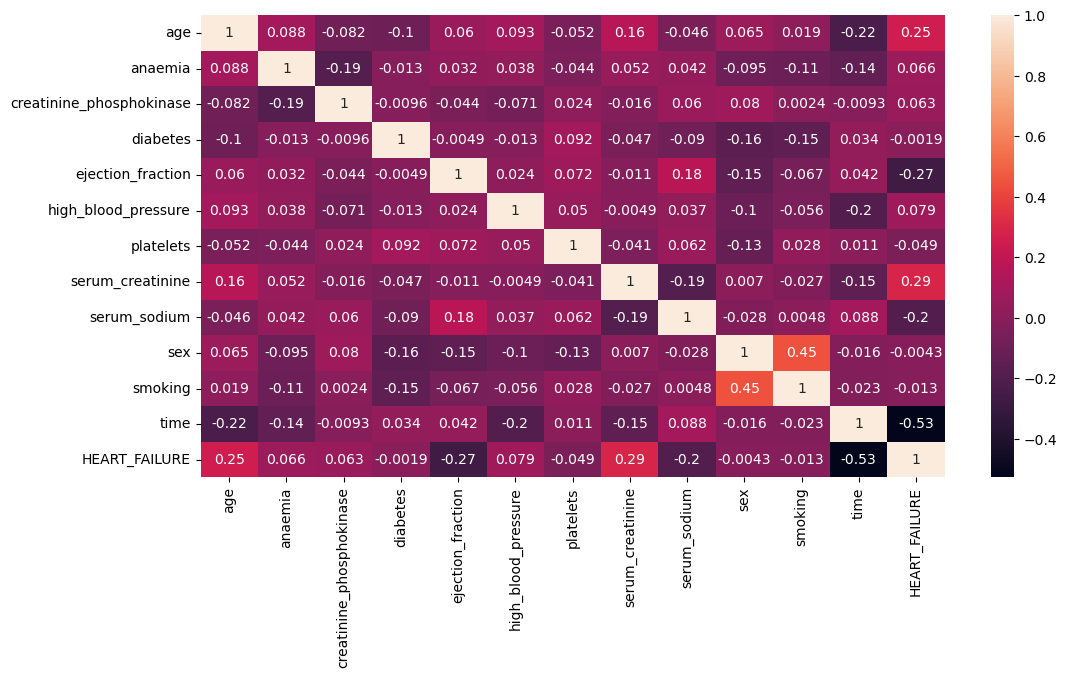

In [7]:
# Creating a heatmap to visualize the correlation matrix of the dataset
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

In [8]:
# Displaying the correlation of each feature with the target variable 'HEART_FAILURE'
data.corr()['HEART_FAILURE'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
HEART_FAILURE               1.000000
Name: HEART_FAILURE, dtype: float64

# Interpretation of the correlation test:

Negative Correlations: The time variable has a strong negative correlation (-0.53) with heart failure, indicating that as the duration of follow-up increases, the likelihood of heart failure decreases.

Positive Correlations: Features such as ejection fraction (0.27), serum sodium levels (0.20), age (0.25), and serum creatinine levels (0.29) show positive correlations with heart failure, suggesting that higher values of these variables may be associated with an increased risk of heart failure.

Weak Correlations: Smoking, sex, and diabetes have weak correlations (close to zero) with heart failure, suggesting that these factors may not be strong indicators of heart failure risk in this dataset.

Insignificant Correlations: Variables like anaemia, high blood pressure, and creatinine phosphokinase exhibit relatively modest correlations (around 0.06 to 0.08) with heart failure, indicating that their influence on heart failure risk may be less pronounced compared to other features.

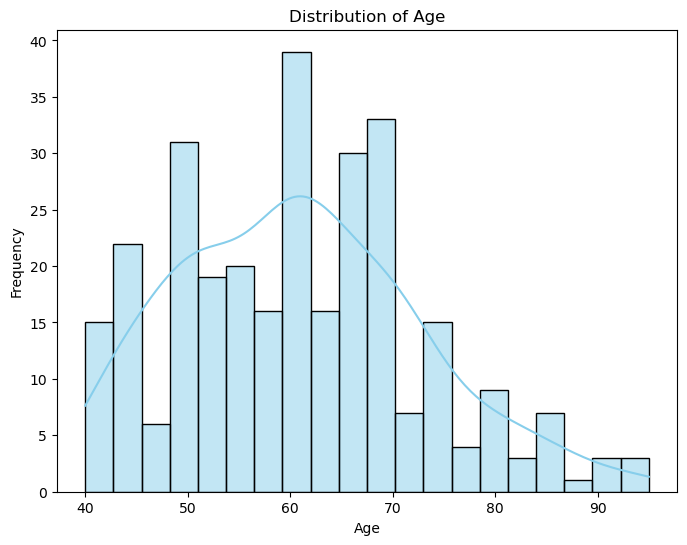

In [9]:
# Distribution of Age:
# Histogram or KDE plot showing the distribution of patient age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

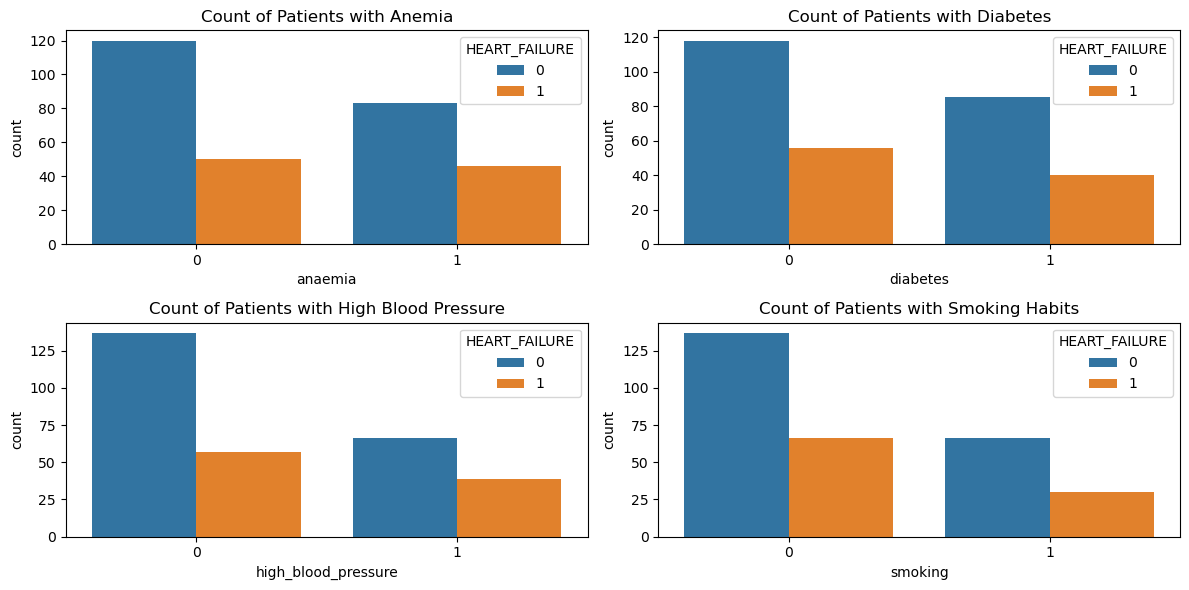

In [10]:
# Count of Patients with Anemia, Diabetes, High Blood Pressure, and Smoking Habits
# Count plot: Show the number of patients with and without these conditions.

plt.figure(figsize=(12, 6))

# Count plot for Anemia
plt.subplot(2, 2, 1)
sns.countplot(x='anaemia', hue='HEART_FAILURE', data=data)
plt.title('Count of Patients with Anemia')

# Count plot for Diabetes
plt.subplot(2, 2, 2)
sns.countplot(x='diabetes', hue='HEART_FAILURE', data=data)
plt.title('Count of Patients with Diabetes')

# Count plot for High Blood Pressure
plt.subplot(2, 2, 3)
sns.countplot(x='high_blood_pressure', hue='HEART_FAILURE', data=data)
plt.title('Count of Patients with High Blood Pressure')

# Count plot for Smoking Habits
plt.subplot(2, 2, 4)
sns.countplot(x='smoking', hue='HEART_FAILURE', data=data)
plt.title('Count of Patients with Smoking Habits')

plt.tight_layout()
plt.show()


Total number of Normal Condition cases:- 203
Total number of Heart Failure cases:- 96


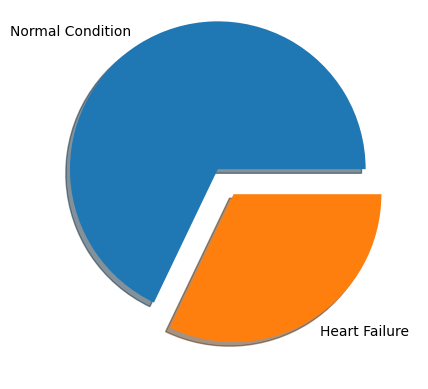

In [11]:
live=data['HEART_FAILURE'][data['HEART_FAILURE'] == 0]
num_live=len(live)
death=data['HEART_FAILURE'][data['HEART_FAILURE'] == 1]
num_death=len(death)
x_axis=np.array([num_live,num_death])
labels=['Normal Condition','Heart Failure']
print(f'Total number of Normal Condition cases:- {num_live}')
print(f'Total number of Heart Failure cases:- {num_death}')
plt.pie(x_axis, labels = labels, explode=[0.2,0.0], shadow = True)
plt.show()

The pie chart visualizes the distribution of heart failure cases in the dataset, illustrating the proportion of normal conditions and heart failure cases, with an emphasis on the contrast between the two conditions using color and an exploded slice.

Total number of Alive with diabetes:- 85
Total number of  Died without diabetes: 56


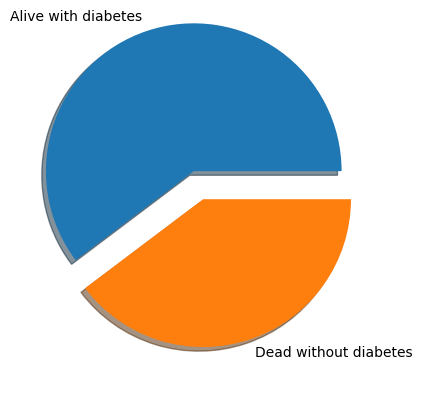

In [12]:
# Analyzing the distribution of heart failure cases among patients with and without diabetes
patient_with_diabetes=data['HEART_FAILURE'][data.diabetes==1][data.HEART_FAILURE==0]
patient_without_diabetes=data['HEART_FAILURE'][data.diabetes==0][data.HEART_FAILURE==1]
num_normal_condition = len(patient_with_diabetes)
num_heart_failure = len(patient_without_diabetes)
x1_axis=np.array([num_normal_condition,num_heart_failure])
labels=['Alive with diabetes','Dead without diabetes']
print(f'Total number of Alive with diabetes:- {num_normal_condition}')
print(f'Total number of  Died without diabetes: {num_heart_failure}')


# Creating a pie chart to visualize the distribution
plt.pie(x1_axis, labels=labels, explode = [0.2,0.0], shadow = True)
plt.show()

The pie chart illustrates the distribution of heart failure cases, highlighting the comparison between patients alive with diabetes and those who have died without diabetes, emphasizing the impact of diabetes on heart failure outcomes

Total number of Alive without diabetes:- 118
Total number of  Died with diabetes: 40


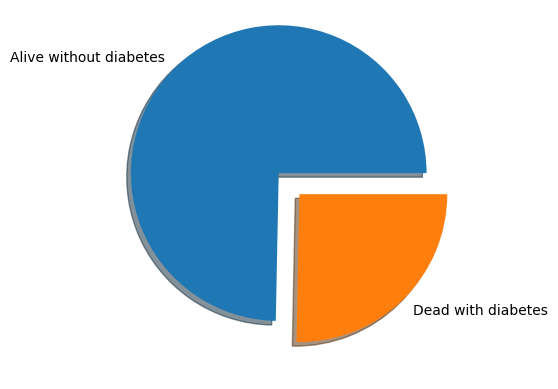

In [13]:
# Analyzing the distribution of heart failure cases among patients with and without diabetes
patient_with_diabetes=data['HEART_FAILURE'][data.diabetes==0][data.HEART_FAILURE==0]
patient_without_diabetes=data['HEART_FAILURE'][data.diabetes==1][data.HEART_FAILURE==1]
num_normal_condition = len(patient_with_diabetes)
num_heart_failure = len(patient_without_diabetes)
x1_axis=np.array([num_normal_condition,num_heart_failure])
labels=['Alive without diabetes','Dead with diabetes']
print(f'Total number of Alive without diabetes:- {num_normal_condition}')
print(f'Total number of  Died with diabetes: {num_heart_failure}')

# Creating a pie chart to visualize the distribution
plt.pie(x1_axis, labels=labels, explode = [0.2,0.0], shadow = True)
plt.show()

The pie chart illustrates the distribution of survival outcomes among patients, emphasizing the contrast between those without diabetes who are alive and those with diabetes who have experienced heart failure, using color and an exploded slice for emphasis.

Total number of Alive without diabetes:- 118
Total number of  Died without diabetes: 56


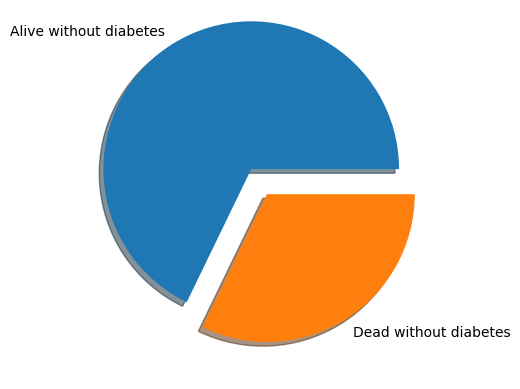

In [14]:
# Analyzing the distribution of heart failure cases among patients without diabetes
patient_with_diabetes=data['HEART_FAILURE'][data.diabetes==0][data.HEART_FAILURE==0]
patient_without_diabetes=data['HEART_FAILURE'][data.diabetes==0][data.HEART_FAILURE==1]
num_normal_condition = len(patient_with_diabetes)
num_heart_failure = len(patient_without_diabetes)
x1_axis=np.array([num_normal_condition,num_heart_failure])
labels=['Alive without diabetes','Dead without diabetes']
print(f'Total number of Alive without diabetes:- {num_normal_condition}')
print(f'Total number of  Died without diabetes: {num_heart_failure}')

# Creating a pie chart to visualize the distribution
plt.pie(x1_axis, labels=labels, explode = [0.2,0.0], shadow = True)
plt.show()

The pie chart visualizes the distribution of survival outcomes among patients, highlighting the contrast between those without diabetes who are alive and those without diabetes who have experienced heart failure, using color and an exploded slice for emphasis.

Total number of Alive with diabetes:- 85
Total number of  Died with diabetes: 40


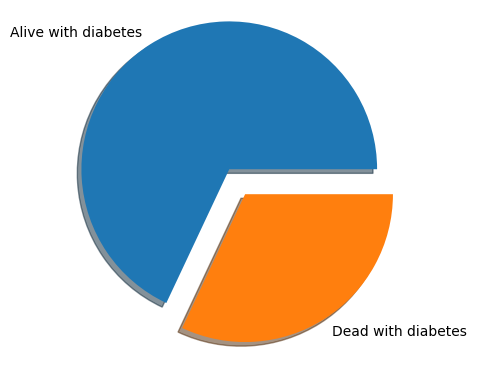

In [15]:
# Analyzing the distribution of heart failure cases among patients with diabetes
patient_with_diabetes=data['HEART_FAILURE'][data.diabetes==1][data.HEART_FAILURE==0]
patient_without_diabetes=data['HEART_FAILURE'][data.diabetes==1][data.HEART_FAILURE==1]
num_normal_condition = len(patient_with_diabetes)
num_heart_failure = len(patient_without_diabetes)
x1_axis=np.array([num_normal_condition,num_heart_failure])
labels=['Alive with diabetes','Dead with diabetes']
print(f'Total number of Alive with diabetes:- {num_normal_condition}')
print(f'Total number of  Died with diabetes: {num_heart_failure}')

# Creating a pie chart to visualize the distribution
plt.pie(x1_axis, labels=labels, explode = [0.2,0.0], shadow = True)
plt.show()

The pie chart visualizes the distribution of survival outcomes among patients with diabetes, emphasizing the contrast between those with diabetes who are alive and those with diabetes who have experienced heart failure, using color and an exploded slice for emphasis.

Total number of Alive:- 167
Total number of Died:- 85


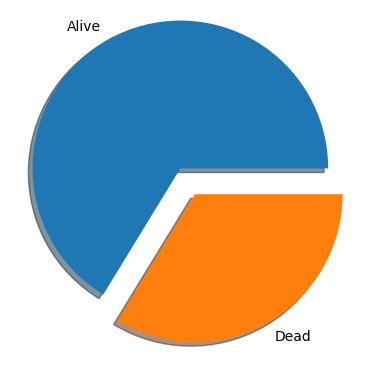

In [16]:
# Visualizing the distribution of 'age' for patients above 50 and their survival status
age_above_50_alive = data['HEART_FAILURE'][data.age >=50][data.HEART_FAILURE == 0]
age_above_50_died = data['HEART_FAILURE'][data.age >= 50][data.HEART_FAILURE == 1]

num_died= len(age_above_50_died)
num_alive= len(age_above_50_alive)

x2_axis= np.array([num_alive, num_died])
labels =['Alive','Dead']

print(f'Total number of Alive:- {num_alive}')
print(f'Total number of Died:- {num_died}')

plt.pie(x2_axis, labels=labels, explode = [0.2, 0.0], shadow= True)
plt.show()

The pie chart visualizes the distribution of survival outcomes among patients aged 50 and above, emphasizing the contrast between those who are alive and those who have experienced heart failure, using color and an exploded slice for emphasis.

C:\Users\dhurvi patel\AppData\Local\Temp\ipykernel_31868\1145128440.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['diabetes'])


<Axes: xlabel='diabetes', ylabel='Density'>

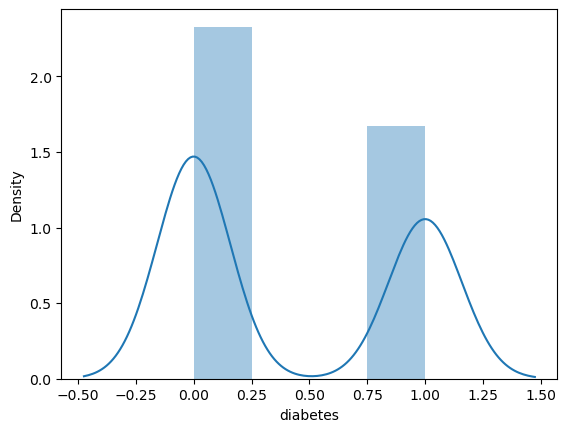

In [17]:
# Creating a distribution plot for the 'diabetes' column
sns.distplot(data['diabetes'])

The seaborn distplot visualizes the distribution of diabetes status in the dataset, providing insights into the prevalence of diabetes among the patients.

C:\Users\dhurvi patel\AppData\Local\Temp\ipykernel_31868\1978008577.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

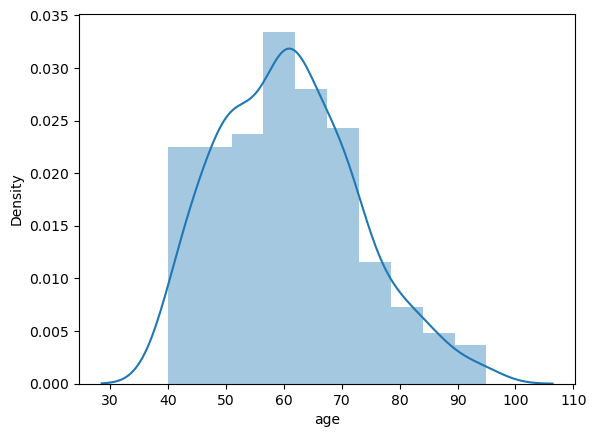

In [18]:
# Visualizing the distribution of the 'age' variable
sns.distplot(data['age'])

The seaborn distplot illustrates the distribution of ages in the dataset, providing insights into the age distribution of the patients.

# Modeling the Data

In [19]:
# Separating features (X) and target variable (Y)
X = data.drop('HEART_FAILURE',axis=1)
Y = pd.DataFrame(data['HEART_FAILURE'])

In [20]:
# Displaying the first few rows of the feature dataset (X)
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [21]:
# Displaying the first few rows of the target dataset (Y)
Y.head()

,HEART_FAILURE
0,1
1,1
2,1
3,1
4,1


In [22]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
# Standardize the features for L1 regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# 1. Recursive Feature Elimination (RFE)
model_rfe = RandomForestClassifier() 
rfe = RFE(model_rfe, n_features_to_select=5)  # Choose the number of features to select
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = X_test.iloc[:, rfe.support_]

C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [25]:
print("Selected features by RFE:")
print(X.columns[rfe.support_])

Selected features by RFE:
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'serum_creatinine', 'time'],
      dtype='object')


In [26]:
# 2. Random Forest Feature Importance
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
importances = model_rf.feature_importances_
selected_features_rf = X.columns[importances.argsort()[::-1][:5]]  # Choose the top 5 features
X_train_rf = X_train[selected_features_rf]
X_test_rf = X_test[selected_features_rf]

C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [27]:
print("Selected features by Random Forest Feature Importance:")
print(selected_features_rf)

Selected features by Random Forest Feature Importance:
Index(['time', 'serum_creatinine', 'ejection_fraction', 'platelets', 'age'], dtype='object')


In [28]:
# 3. L1 Regularization (Lasso)
model_lasso = LogisticRegression(penalty='l1', solver='liblinear')
model_lasso.fit(X_train_scaled, y_train)
coefficients = model_lasso.coef_[0]
selected_features_lasso = X.columns[coefficients != 0]
X_train_lasso = X_train[selected_features_lasso]
X_test_lasso = X_test[selected_features_lasso]

C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print("Selected features by L1 Regularization (Lasso):")
print(selected_features_lasso)

Selected features by L1 Regularization (Lasso):
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')


In [30]:
# 4. Correlation-based Feature Selection
# We chose a correlation threshold based on our dataset characteristics
correlation_threshold = 0.5
# Calculate the correlation matrix
correlation_matrix = X.corrwith(Y['HEART_FAILURE'])
# Identify features with correlation above the threshold
selected_features_corr = X.columns[(correlation_matrix.abs() > correlation_threshold) & (X.columns != 'HEART_FAILURE')]
# Create new DataFrames with selected features
X_selected_corr = X[selected_features_corr]
X_train_corr = X_train[selected_features_corr]
X_test_corr = X_test[selected_features_corr]

In [31]:
print("Selected features by Correlation-based Feature Selection:")
print(selected_features_corr)

Selected features by Correlation-based Feature Selection:
Index(['time'], dtype='object')


In [32]:
# Evaluate models using cross-validation
def evaluate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

In [33]:
# Evaluate each model
score_rfe = evaluate_model(model_rfe, X_train_rfe, y_train)
score_rf = evaluate_model(model_rf, X_train_rf, y_train)
score_lasso = evaluate_model(model_lasso, X_train_lasso, y_train)
score_corr = evaluate_model(model_rf, X_train_corr, y_train)

C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [34]:
# Compare the results
results = {
    'RFE': score_rfe,
    'Random Forest': score_rf,
    'L1 Regularization': score_lasso,
    'Correlation-based': score_corr
}

best_method = max(results, key=results.get)
print("Results:")
for method, score in results.items():
    print(f"{method}: {score}")

print(f"\nBest Feature Selection Method: {best_method}")

Results:
RFE: 0.8578014184397162
Random Forest: 0.8579787234042554
L1 Regularization: 0.8323581560283688
Correlation-based: 0.824290780141844

Best Feature Selection Method: Random Forest


In [35]:
# Now X_train and X_test are updated based on the best-performing feature selection method
if best_method == 'RFE':
    X_train = X_train_rfe
    X_test = X_test_rfe
elif best_method == 'Random Forest':
    X_train = X_train_rf
    X_test = X_test_rf
elif best_method == 'L1 Regularization':
    X_train = X_train_lasso
    X_test = X_test_lasso
elif best_method == 'Correlation-based':
    X_train = X_train_corr
    X_test = X_test_corr
else:
    print("Invalid method selected")

# Model -1 : Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [37]:
# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

In [38]:
# Create the Logistic Regression model
model1 = LogisticRegression()

In [39]:
# Create GridSearchCV
grid_search = GridSearchCV(model1, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [40]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [41]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [42]:
# Using the best model for prediction
best_logreg_model = grid_search.best_estimator_
y_pred1 = best_logreg_model.predict(X_test)

In [43]:
# Evaluate the performance of the best model
accuracy_best = accuracy_score(y_test, y_pred1)
conf_matrix_best = confusion_matrix(y_test, y_pred1)
classification_report_best = classification_report(y_test, y_pred1)

In [44]:
# Print the evaluation metrics
print("Accuracy:", accuracy_best)
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(classification_report_best)

Accuracy: 0.7833333333333333
Confusion Matrix:
[[33  2]
 [11 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



# Model -2 : K-Nearest Neighbors (KNN)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [46]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2]  # Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance)
}

In [47]:
# Create the KNN model
model2 = KNeighborsClassifier()

In [48]:
# Create GridSearchCV
grid_search = GridSearchCV(model2, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [49]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [50]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [51]:
# Use the best model for prediction
best_knn_model = grid_search.best_estimator_
y_pred2 = best_knn_model.predict(X_test)

In [52]:
# Evaluate the performance of the best model
conf_matrix_best_knn = confusion_matrix(y_test, y_pred2)

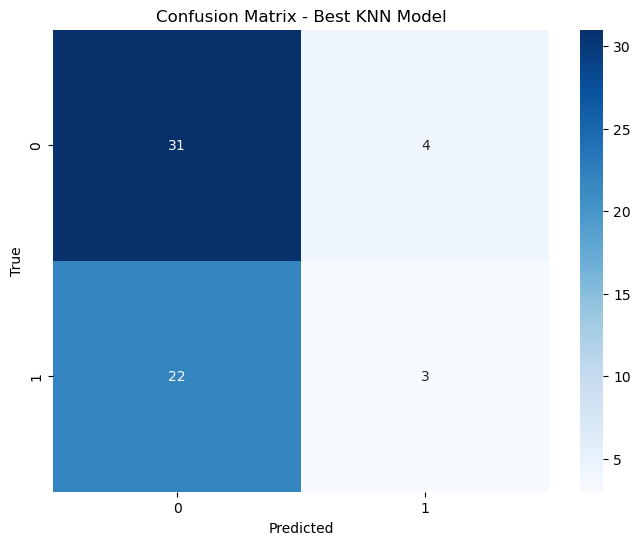

In [53]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best KNN Model')
plt.show()

In [54]:
# Evaluate the performance of the best model
accuracy_best = accuracy_score(y_test, y_pred2)
conf_matrix_best = confusion_matrix(y_test, y_pred2)
classification_report_best = classification_report(y_test, y_pred2)

In [55]:
# Print the evaluation metrics
print("Accuracy:", accuracy_best)
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(classification_report_best)

Accuracy: 0.5666666666666667
Confusion Matrix:
[[31  4]
 [22  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.89      0.70        35
           1       0.43      0.12      0.19        25

    accuracy                           0.57        60
   macro avg       0.51      0.50      0.45        60
weighted avg       0.52      0.57      0.49        60



# Model-3 : Support Vector Machines (SVM)

# * SVC

In [56]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [57]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
}

In [58]:
# Create the SVM model with a linear kernel
model3 = svm.SVC(kernel='linear')

In [59]:
# Create GridSearchCV
grid_search = GridSearchCV(model3, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [60]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [61]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.01}


In [62]:
# Use the best model for prediction
best_svm_model = grid_search.best_estimator_
y_pred3 = best_svm_model.predict(X_test)

In [63]:
# Evaluate the performance of the best model
conf_matrix_best_svm = confusion_matrix(y_test, y_pred3)

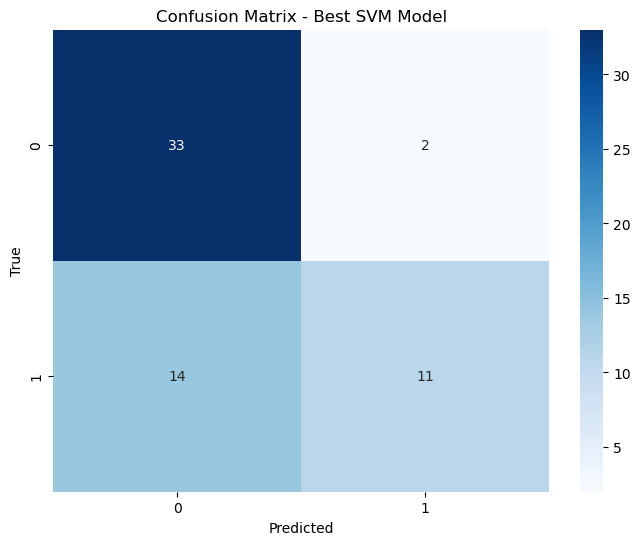

In [64]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best SVM Model')
plt.show()

In [65]:
# Evaluate the performance of the best model
accuracy_best = accuracy_score(y_test, y_pred3)
conf_matrix_best = confusion_matrix(y_test, y_pred3)
classification_report_best = classification_report(y_test, y_pred3)

In [66]:
# Print the evaluation metrics
print("Accuracy:", accuracy_best)
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(classification_report_best)

Accuracy: 0.7333333333333333
Confusion Matrix:
[[33  2]
 [14 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        35
           1       0.85      0.44      0.58        25

    accuracy                           0.73        60
   macro avg       0.77      0.69      0.69        60
weighted avg       0.76      0.73      0.71        60



# Model-4 : Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [68]:
# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for split
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

In [69]:
# Create the Decision Tree model
model4 = DecisionTreeClassifier()

In [70]:
# Create GridSearchCV
grid_search = GridSearchCV(model4, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [71]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [72]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [73]:
# Use the best model for prediction
best_dt_model = grid_search.best_estimator_
y_pred4 = best_dt_model.predict(X_test)

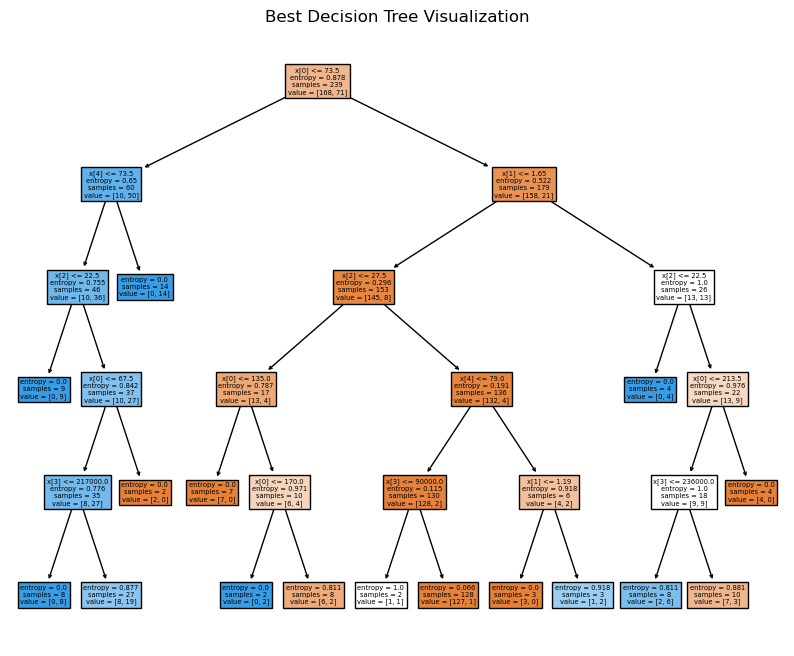

In [74]:
# Visualize the best decision tree
plt.figure(figsize=(10, 8))
plot_tree(best_dt_model, filled=True)
plt.title('Best Decision Tree Visualization')
plt.show()

In [75]:
# Evaluate the performance of the best model
conf_matrix_best_dt = confusion_matrix(y_test, y_pred4)

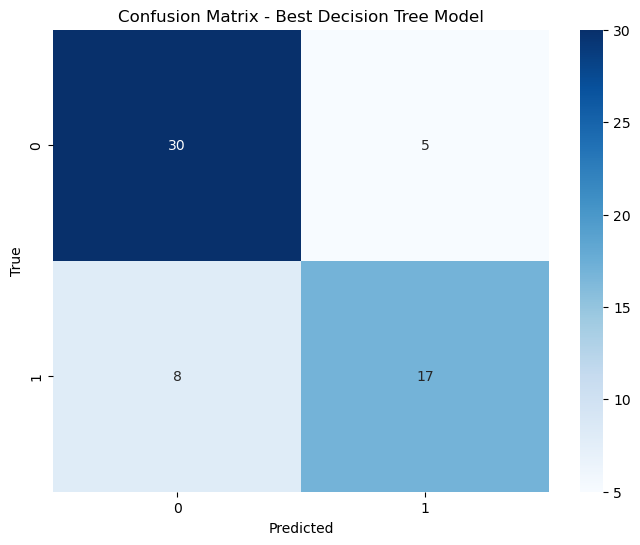

In [76]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best Decision Tree Model')
plt.show()

In [77]:
# Evaluate the performance of the best model
accuracy_best = accuracy_score(y_test, y_pred4)
conf_matrix_best = confusion_matrix(y_test, y_pred4)
classification_report_best = classification_report(y_test, y_pred4)

In [78]:
# Print the evaluation metrics
print("Accuracy:", accuracy_best)
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(classification_report_best)

Accuracy: 0.7833333333333333
Confusion Matrix:
[[30  5]
 [ 8 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.77      0.68      0.72        25

    accuracy                           0.78        60
   macro avg       0.78      0.77      0.77        60
weighted avg       0.78      0.78      0.78        60



# Model -5:RandomForest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [80]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

In [81]:
# Create the RandomForestClassifier model
model5 = RandomForestClassifier()

In [82]:
# Create GridSearchCV
grid_search = GridSearchCV(model5, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [83]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [84]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [85]:
# Use the best model for prediction
best_rf_model = grid_search.best_estimator_
y_pred5 = best_rf_model.predict(X_test)

In [86]:
# Evaluate the performance of the best model
conf_matrix_best_rf = confusion_matrix(y_test, y_pred5)

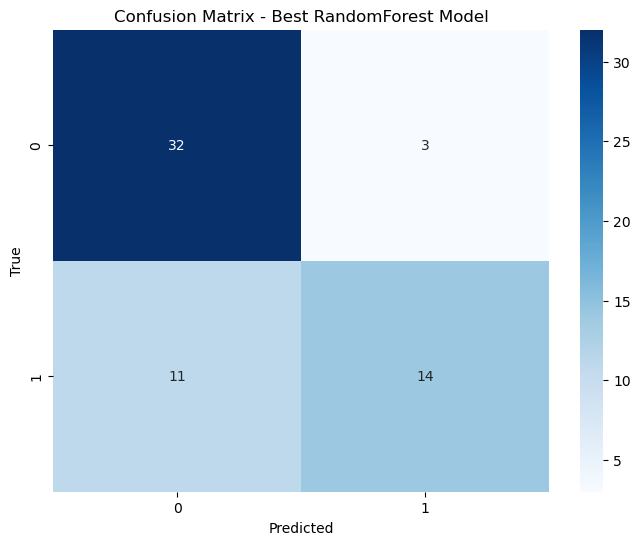

In [87]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best RandomForest Model')
plt.show()

In [88]:
# Evaluate the performance of the best model
accuracy_best = accuracy_score(y_test, y_pred5)
conf_matrix_best = confusion_matrix(y_test, y_pred5)
classification_report_best = classification_report(y_test, y_pred5)

In [89]:
# Print the evaluation metrics
print("Accuracy:", accuracy_best)
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(classification_report_best)

Accuracy: 0.7666666666666667
Confusion Matrix:
[[32  3]
 [11 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.82      0.56      0.67        25

    accuracy                           0.77        60
   macro avg       0.78      0.74      0.74        60
weighted avg       0.78      0.77      0.76        60



# Model -6 : Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [91]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
}

In [92]:
# Create the GradientBoostingClassifier model
model6 = GradientBoostingClassifier(random_state=42)

In [93]:
# Create GridSearchCV
grid_search = GridSearchCV(model6, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [94]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

C:\Users\dhurvi patel\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [95]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [96]:
# Use the best model for prediction
best_gb_model = grid_search.best_estimator_
y_pred6 = best_gb_model.predict(X_test)

In [97]:
# Evaluate the performance of the best model
conf_matrix_best_gb = confusion_matrix(y_test, y_pred6)

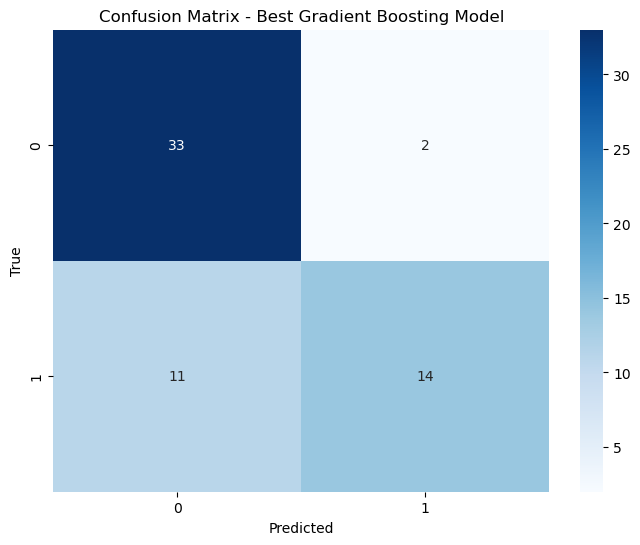

In [98]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best Gradient Boosting Model')
plt.show()

In [99]:
# Evaluate the performance of the best model
accuracy_best = accuracy_score(y_test, y_pred6)
conf_matrix_best = confusion_matrix(y_test, y_pred6)
classification_report_best = classification_report(y_test, y_pred6)

In [100]:
# Print the evaluation metrics
print("Accuracy:", accuracy_best)
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(classification_report_best)

Accuracy: 0.7833333333333333
Confusion Matrix:
[[33  2]
 [11 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



# Model -7 : XGBoostClassifier

In [101]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [102]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of the tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
}

In [103]:
# Create the XGBClassifier model
model7 = xgb.XGBClassifier(random_state=42)

In [104]:
# Create GridSearchCV
grid_search = GridSearchCV(model7, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [105]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [106]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.8}


In [107]:
# Use the best model for prediction
best_xgb_model = grid_search.best_estimator_
y_pred7 = best_xgb_model.predict(X_test)

In [108]:
# Evaluate the performance of the best model
conf_matrix_best_xgb = confusion_matrix(y_test, y_pred7)

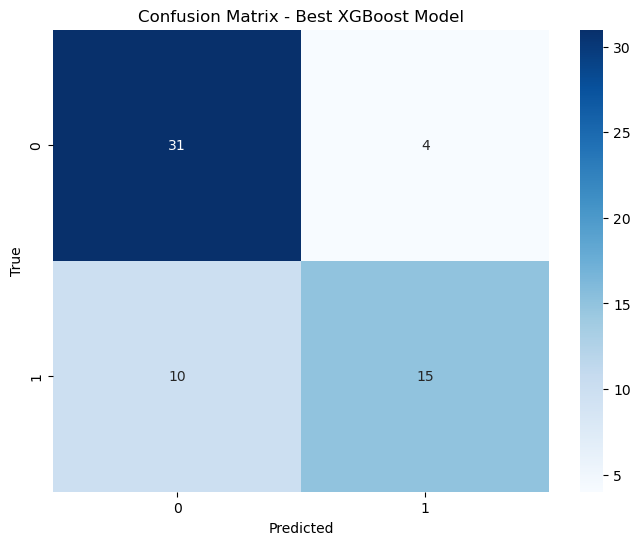

In [109]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best XGBoost Model')
plt.show()

In [110]:
# Evaluate the performance of the best model
accuracy_best = accuracy_score(y_test, y_pred7)
conf_matrix_best = confusion_matrix(y_test, y_pred7)
classification_report_best = classification_report(y_test, y_pred7)

In [111]:
# Print the evaluation metrics
print("Accuracy:", accuracy_best)
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(classification_report_best)

Accuracy: 0.7666666666666667
Confusion Matrix:
[[31  4]
 [10 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.79      0.60      0.68        25

    accuracy                           0.77        60
   macro avg       0.77      0.74      0.75        60
weighted avg       0.77      0.77      0.76        60



# Comparing the Models

In [112]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [113]:
# Creating an empty DataFrame for model comparison
model_comparison_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [114]:
# List of model names
model_names = ['Logistic Regression', 'K-Nearest Neighbors (KNN)', 'Support Vector Machines (SVM)', ' Decision Tree', 'RandomForest Classifier', 'Gradient Boosting', 'XGBoostClassifier']

In [115]:
# List of corresponding y_pred variables
y_pred_list = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7]

In [116]:
# Evaluate each model and store the results in the DataFrame
for model_name, y_pred in zip(model_names, y_pred_list):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_comparison_df = model_comparison_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

C:\Users\dhurvi patel\AppData\Local\Temp\ipykernel_31868\3248619716.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison_df = model_comparison_df.append({
C:\Users\dhurvi patel\AppData\Local\Temp\ipykernel_31868\3248619716.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison_df = model_comparison_df.append({
C:\Users\dhurvi patel\AppData\Local\Temp\ipykernel_31868\3248619716.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison_df = model_comparison_df.append({
C:\Users\dhurvi patel\AppData\Local\Temp\ipykernel_31868\3248619716.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_compa

In [117]:
print(model_comparison_df)

                           Model  Accuracy  Precision  Recall  F1 Score
0            Logistic Regression  0.783333   0.875000    0.56  0.682927
1      K-Nearest Neighbors (KNN)  0.566667   0.428571    0.12  0.187500
2  Support Vector Machines (SVM)  0.733333   0.846154    0.44  0.578947
3                  Decision Tree  0.783333   0.772727    0.68  0.723404
4        RandomForest Classifier  0.766667   0.823529    0.56  0.666667
5              Gradient Boosting  0.783333   0.875000    0.56  0.682927
6              XGBoostClassifier  0.766667   0.789474    0.60  0.681818


Accuracy: Logistic Regression, Decision Tree, and Gradient Boosting have the highest accuracy (0.783333), but accuracy alone might not be sufficient, especially if the classes are imbalanced.

Precision: Logistic Regression, Gradient Boosting, and RandomForest Classifier have high precision, indicating a low rate of false positives.

Recall: Decision Tree and Gradient Boosting have the highest recall, suggesting a good ability to capture positive instances.

F1 Score: Decision Tree has the highest F1 score, which balances precision and recall.

# RESULTS
- If precision (minimizing false positives) is crucial, Logistic Regression or Gradient Boosting might be preferred.

- If recall (capturing positive instances) is crucial, Decision Tree or Gradient Boosting might be preferred.

- If you want a balance between precision and recall, Decision Tree seems to perform well across these metrics.